In [ ]:
# https://www.javatpoint.com/postgresql-user-defined-data-type

# Create our own data types out of schema
CREATE DOMAIN addr VARCHAR(100) NOT NULL

# Assign that domain
CREATE TABLE locations (
	address addr
)

# Insert it
INSERT INTO locations (address) VALUES('123 london street')

SELECT * FROM locations 

address          |
-----------------+
123 london street|

# The type is changing (pic below)


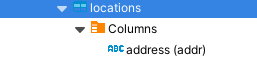

In [ ]:
# Using numeric value with CHECK : if value less than 0 raise an error
CREATE DOMAIN positive_numeric INT NOT NULL CHECK (VALUE > 0)

CREATE TABLE sample(
	sample_id SERIAL PRIMARY KEY,
	value_num positive_numeric 
)

INSERT INTO sample (value_num) VALUES(5)

# sample_id (1) it's an error because it inserted with  -10 value first
sample_id|value_num|
---------+---------+
        2|        5|

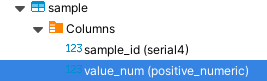

In [ ]:
# Create domain data type for email constrain

In [ ]:
# Error constrain when insert email does not meet with regex in email constrain

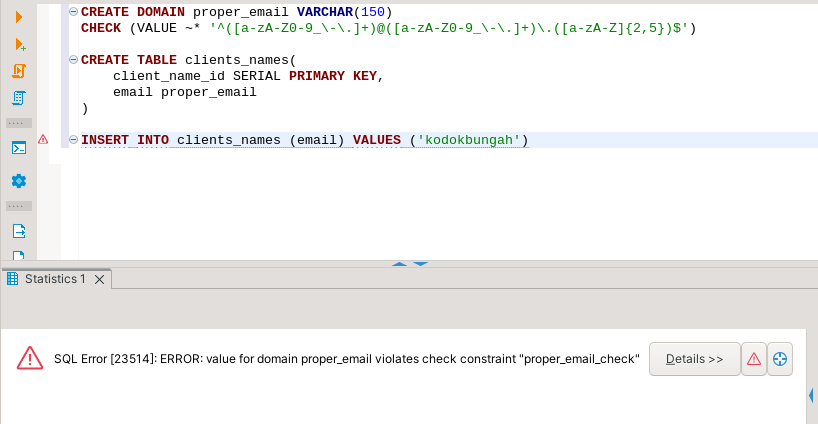

In [ ]:
# The right way 
INSERT INTO clients_names (email) VALUES ('kodokbungah@gmail.com')

SELECT * FROM clients_names

client_name_id|email                |
--------------+---------------------+
             2|kodokbungah@gmail.com|
    
    

In [ ]:
# Enum set constraint 

In [ ]:
# Error constrain when insert orange does not meet enum requirement

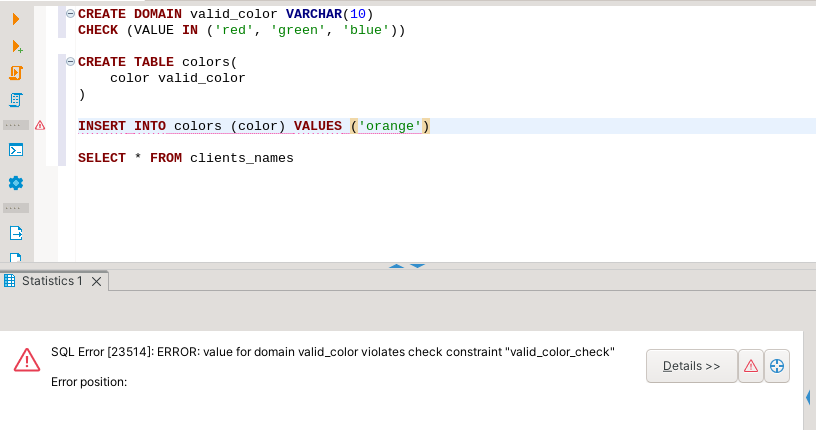

In [ ]:
# The right way 
CREATE DOMAIN valid_color VARCHAR(10)
CHECK (VALUE IN ('red', 'green', 'blue'))

CREATE TABLE colors(
	color valid_color 
)

INSERT INTO colors (color) VALUES ('green')

SELECT * FROM colors

color|
-----+
green|

In [ ]:
# Select all user defined data type
# 'd' is for domain data types 
# 'public' is for schema name
SELECT typname
FROM pg_catalog.pg_type
JOIN pg_catalog.pg_namespace
ON pg_namespace.oid = pg_type.typnamespace
WHERE 
typtype = 'd' AND nspname = 'public'

# result
typname         |
----------------+
addr            |
positive_numeric|
proper_email    |
valid_color     |



In [ ]:
# Delete User Defined Domain
# Becarefull when using this stuff
DROP DOMAIN positive_numeric CASCADE

In [ ]:
# CREATE TYPE

# User defined type
CREATE TYPE address AS(
	city VARCHAR(50),
	country VARCHAR(20)
)

CREATE TABLE companies(
	comp_id SERIAL PRIMARY KEY,
	address address 
)

INSERT INTO companies (address) VALUES (ROW('NEW YORK', 'UK'))

INSERT INTO companies (address) VALUES (ROW('NEW YORK', 'US'))

SELECT * FROM companies 

comp_id|address      |
-------+-------------+
      1|(NEW YORK,UK)|
      2|(NEW YORK,US)|
        
        
# Select composite column : 
# (composite_column).field_name
SELECT (address).country FROM companies 

country|
-------+
UK     |
US     |

# Same as 
SELECT (address).city FROM companies

city    |
--------+
NEW YORK|
NEW YORK|

//CHECK ANOTHER TYPE IN VIDEO COURSE